In [2]:
from keras.src.utils.audio_dataset_utils import paths_and_labels_to_dataset

pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached grpcio-1.76.0-cp39-cp39-macosx_11_0_universal2.whl.metadata (3.7 kB)
  Using cached tensorboar

In [8]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0

In [55]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Traitement des données

In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

/Users/tomloustau/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [156]:
image_test = Image.open("Image_os/Apple/Apple(1).png")
image_gray = image_test.convert('L')

In [157]:
image_data = np.asarray(image_gray)

In [158]:
image_data.shape

(172, 201)

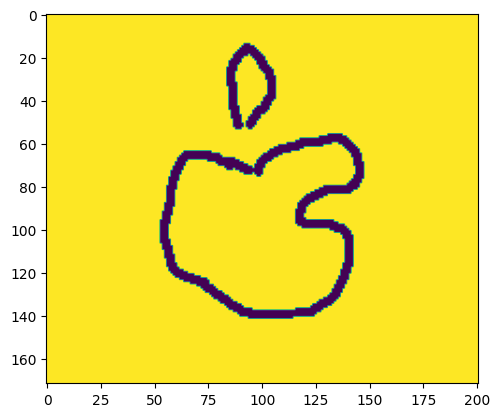

In [159]:
plt.imshow(image_data)

In [160]:
dic_image = {
    "apple" : [],
    "linux" : [],
    "windows" : []
}

In [161]:
dic_assoc = {
    "apple" : np.array([1, 0, 0]),
    "linux" : np.array([0, 1, 0]),
    "windows" : np.array([0, 0, 1])
}

Remplissage des images apple

In [162]:
for i in range(0, 19):
    imageRGB = Image.open(f"Image_os/Apple/Apple({i}).png")
    imageRGB = imageRGB.resize((110, 110))
    image_gray = imageRGB.convert('L')
    image_data = np.asarray(image_gray)
    image_data = image_data / np.max(image_data)
    image_flatten = image_data.reshape(-1,1)
    dic_image["apple"].append(image_data)


Remplissage des images linux

In [163]:
for i in range(0, 19):
    imageRGB = Image.open(f"Image_os/Linux/Linux({i}).png")
    imageRGB = imageRGB.resize((110, 110))
    image_gray = imageRGB.convert('L')
    image_data = np.asarray(image_gray)
    image_data = image_data / np.max(image_data)
    image_flatten = image_data.reshape(-1,1)
    dic_image["linux"].append(image_data)

Remplissage des images windows

In [164]:
for i in range(0, 19):
    imageRGB = Image.open(f"Image_os/Windows/Windows({i}).png")
    imageRGB = imageRGB.resize((110, 110))
    image_gray = imageRGB.convert('L')
    image_data = np.asarray(image_gray)
    image_data = image_data / np.max(image_data)
    image_flatten = image_data.reshape(-1,1)
    dic_image["windows"].append(image_data)

In [165]:
X = []
y = []
for cle, val in dic_image.items():
    X.append(val)
    for i in range(len(val)):
        y.append(dic_assoc[cle])


In [167]:
for i in range(len(X)):
    X[i] = np.array(X[i])

In [168]:
X_temp = np.vstack((X[0], X[1]))

In [169]:
X = np.vstack((X[0], X_temp))

In [172]:
y = np.array(y)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
"""p = 45
modele = Sequential()"""

In [144]:
"""modele.add(Input(shape=(12100,)))
modele.add(Dense(p, activation='sigmoid'))
modele.add(Dense(p, activation='sigmoid'))
modele.add(Dense(3, activation='softmax'))

modele.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])"""

In [145]:
#modele.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3160 - loss: 1.2681  
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3472 - loss: 1.1686
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3472 - loss: 1.1242
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3368 - loss: 1.1134
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3160 - loss: 1.1074
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3264 - loss: 1.1036
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3472 - loss: 1.0976
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3368 - loss: 1.0966
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3472 - loss: 1.0956
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4986 - loss: 1.0949
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3664 - loss: 1.0955
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4586 - 

In [146]:
#resultat = modele.evaluate(X_test, y_test, verbose=0)

In [147]:
#print(resultat[1])

0.3333333432674408


In [188]:
modele = Sequential()

modele.add(Conv2D(100,(3, 3), activation='relu', input_shape=(110, 110, 1)))
modele.add(MaxPooling2D((2,2)))

modele.add(Conv2D(100,(3, 3), activation='relu'))
modele.add(MaxPooling2D((2,2)))

modele.add(Conv2D(100,(3, 3), activation='relu'))
modele.add(MaxPooling2D((2,2)))

modele.add(Flatten())
modele.add(Dense(32, activation='relu'))
modele.add(Dropout(0.2)) # Pour eviter l'overfiting, une fois sur 5 certains neuronnes ne vont pas s'activer
modele.add(Dense(3, activation='softmax'))

modele.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 108, 108, 100)  │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 54, 54, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 52, 52, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 26, 26, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │       460,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,131 (2.45 MB)

 Trainable params: 642,131 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [189]:
modele.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [190]:
history = modele.fit(X, y, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.2913 - loss: 0.7002 - val_accuracy: 0.2500 - val_loss: 0.6451
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.2939 - loss: 0.6572 - val_accuracy: 0.5833 - val_loss: 0.6605
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.4603 - loss: 0.6533 - val_accuracy: 0.2500 - val_loss: 0.6438
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.3940 - loss: 0.6372 - val_accuracy: 0.5833 - val_loss: 0.6406
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.3953 - loss: 0.6516 - val_accuracy: 0.5833 - val_loss: 0.6273
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5514 - loss: 0.6228 - val_accuracy: 0.5833 - val_loss: 0.6135
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6515 - loss: 0.6056 - val_accuracy: 0.6667 - val_loss: 0.5805
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6060 - loss: 0.5869 - val_accuracy: 0.5833 - val_loss:

In [203]:
resultat = modele.evaluate(X, y, verbose=0)
print("Loss : ", resultat[0], "Accurracy", resultat[1])

Loss :  0.4215705692768097 Accurracy 0.6491228342056274


In [204]:
y.shape

(57, 3)

In [206]:
prediction = modele.predict(X)
for i in range(0, 50):
    print(y[i], prediction[i])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1 0 0] [0.4221798  0.5286016  0.04921868]
[1 0 0] [0.32301477 0.42600676 0.2509784 ]
[1 0 0] [0.34166095 0.43972343 0.21861558]
[1 0 0] [0.24900512 0.36301643 0.38797846]
[1 0 0] [0.3171162  0.4223192  0.26056454]
[1 0 0] [0.4084883  0.52779335 0.0637183 ]
[1 0 0] [0.42422688 0.5539293  0.02184375]
[1 0 0] [0.4449541  0.5346203  0.02042569]
[1 0 0] [0.41249186 0.55401146 0.03349672]
[1 0 0] [0.39706227 0.547097   0.05584069]
[1 0 0] [0.45700562 0.52725005 0.01574437]
[1 0 0] [0.43050948 0.55334496 0.01614561]
[1 0 0] [0.3836358  0.5007127  0.11565143]
[1 0 0] [0.42618912 0.5230855  0.05072541]
[1 0 0] [0.3539671  0.5179426  0.12809023]
[1 0 0] [0.40050778 0.55410737 0.04538491]
[1 0 0] [0.4328753  0.540929   0.02619572]
[1 0 0] [0.40987447 0.5390652  0.0510604 ]
[1 0 0] [0.46809506 0.5036994  0.02820551]
[0 1 0] [0.4221798  0.5286016  0.04921868]
[0 1 0] [0.32301477 0.42600676 0.2509784 ]
[0 1 0] [0.34166095 0.43972343 0.21861558]
[0 1 0] [0.24900